# Tarea L3 - Análisis de caso - Métricas de desempeño de un modelo

Se nos ha solicitado entrenar y evaluar un modelo de regresión lineal para estimar precios de venta de vehículos usados basado en las variables antigüedad, puertas y kilometraje.

Para comenzar, importaremos las librerías que necesitaremos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
mean_absolute_error as mae,
mean_squared_error as mse,
root_mean_squared_error as rmse,
r2_score as r2
)


set_config(transform_output="pandas")

In [2]:
dir_datos = os.path.join(".", "Data")
datos = pd.read_csv(os.path.join(dir_datos, "L6_datos.csv"))

In [3]:
datos.head()

,ID,Antigüedad (años),Kilometraje (km),Puertas,Precio (USD)
0,1,5,50000,4,12000
1,2,3,30000,2,15000
2,3,7,70000,4,9000
3,4,2,25000,2,16000


Al realizar una inspección rápida de los datos, observamos que este conjunto de datos no contiene datos perdidos, y además todas las variables se encuentran en rangos razonables. Además, no hay variables categóricas en los datos. Sin embargo, dado que los modelos de regresión lineal son sensibles a la escala de las variables, es necesario realizar un escalamiento a las variables para que se encuentren en un rango de valores similar. Dado que los valores de observaciones futuras pueden no estar dentro del rango visto en este conjunto de datos, optaremos por un escalamiento usando el método Z-Score.

Por otro lado, se nos ha solicitado se nos ha solicitado preparar un conjunto de entrenamiento y prueba en una proporción 80%-20%. Esto lo lograremos usando la función train_test_split de sklearn.

Usaremos la función make_pipeline para integrar los pasos de escalamiento de datos y entrenamiento del modelo en un solo objeto.

In [4]:
modelo = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
modelo

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


A continuación, procedemos a dividir el conjunto de datos en uno de entrenamiento y uno de prueba.

In [5]:
X = datos.drop(columns=["ID", "Precio (USD)"])
y = datos["Precio (USD)"]

In [6]:
X.head()

,Antigüedad (años),Kilometraje (km),Puertas
0,5,50000,4
1,3,30000,2
2,7,70000,4
3,2,25000,2


In [7]:
y.head()

0    12000
1    15000
2     9000
3    16000
Name: Precio (USD), dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train.head()

,Antigüedad (años),Kilometraje (km),Puertas
3,2,25000,2
1,3,30000,2
0,5,50000,4


In [10]:
y_train.head()

3    16000
1    15000
0    12000
Name: Precio (USD), dtype: int64

Procedemos ahora a entrenar el modelo.

In [11]:
modelo.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [12]:
modelo["linearregression"].intercept_

np.float64(14333.333333333334)

In [13]:
modelo["linearregression"].coef_

array([-896.43874891, -607.56944048, -206.23947785])

Ahora evaluaremos el modelo usando las métricas solicitadas.

In [14]:
y_pred = modelo.predict(X_test)

In [15]:
mae_score = mae(y_pred, y_test)
mae_score

437.50000000000364

In [16]:
mse_score = mse(y_pred, y_test)
mse_score

191406.25000000317

In [17]:
rmse_score = rmse(y_pred, y_test)
rmse_score

437.50000000000364

In [18]:
r2_score_train = r2(y_train, modelo.predict(X_train))
r2_score_train

1.0

In [19]:
r2_score_all = r2(y, modelo.predict(X))
r2_score_all

0.9936197916666666

En general, el modelo es bastante preciso, con un error de USD437 respecto al precio real del vehículo, alrededor del 5% del valor real. Dado que el conjunto de prueba consta de solo una observación, la evaluación con MAE y con RMSE son equivalentes para este caso. Por otro caso, no es posible evaluar el modelo con el coeficiente R^2, dado que esta métrica requiere de al menos dos observaciones en el conjunto de prueba. Por ello, se opta por calcular dicho coeficiente con el conjunto de prueba y con el conjunto de datos completo, observando cuando dicho coeficiente decae en este último respecto delk primero. Se observa que el coeficiente solo decae en 0.007 puntos.

Finalezamos esta actividad graficando una comparación entre los precios reales y los predichos por el modelo.

In [20]:
np.concatenate((y, modelo.predict(X)))

array([12000. , 15000. ,  9000. , 16000. , 12000. , 15000. ,  9437.5,
       16000. ])

In [21]:
identidad = np.linspace(np.min(np.concatenate((y, modelo.predict(X)))), np.max(np.concatenate((y, modelo.predict(X)))), num=y.shape[0])
plot_data = pd.DataFrame({
    "Precio Real": y,
    "Precio Predicho": modelo.predict(X),
})
identity_data = pd.DataFrame({
    "Identidad": identidad,
})
plot_data.head()

,Precio Real,Precio Predicho
0,12000,12000.0
1,15000,15000.0
2,9000,9437.5
3,16000,16000.0


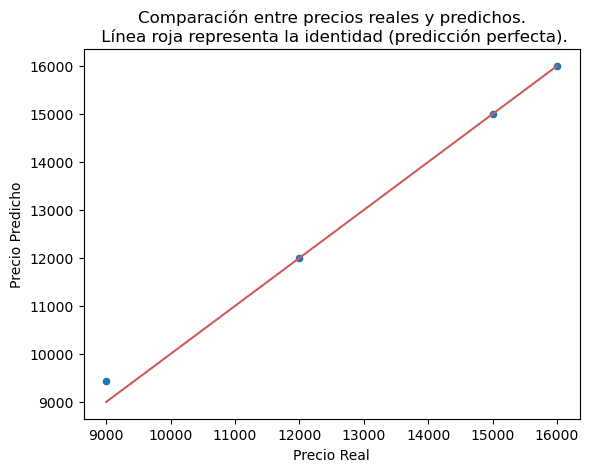

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(plot_data, x="Precio Real", y="Precio Predicho", ax=ax).set_title(
    "Comparación entre precios reales y predichos.\n Línea roja representa la identidad (predicción perfecta)."
)
sns.lineplot(identity_data, x="Identidad", y="Identidad", ax=ax, color="indianred");

In [23]:
fig.savefig(os.path.join("", "Imagenes", "real_vs_predicho.png"))